In [1]:
# import the python libraries
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import numpy as np  
from sklearn.linear_model import LinearRegression  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  

In [2]:
# read dataset csv file
df = pd.read_csv('houseprice_data.csv')

In [3]:
# To Display the first n rows of the dataset, we use the function below.
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# To display the shape of the array for the dataset, we use the function below.
df.shape

(21613, 19)

In [5]:
# To view some basic statistical details, we use the function below.
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# get an overview of data types presented in the dataset
df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Checking for missing values

In [7]:
# get the total number of missing values in the dataset
num_missing = df.isna().sum()
print(num_missing)

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [8]:
#df.apply(lambda x: sum(x.isnull()), axis=0)

Since there where no missing values in the dataset, we dont need to drop any null values.

In [9]:
# remove any null values from data rows
#df = df.dropna()

##  Finding correlation between variables

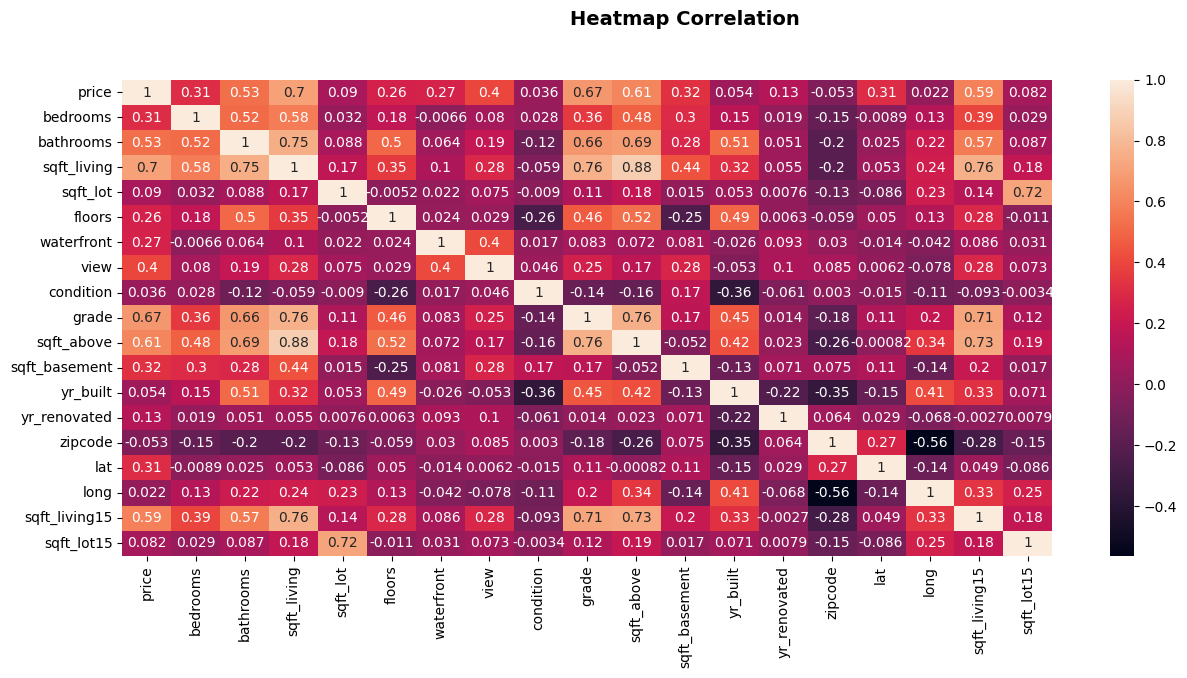

In [10]:
# plot heatmap
fig = plt.figure(figsize=(15, 7))

# title by setting initial sizes
fig.suptitle('Heatmap Correlation', fontsize=14, fontweight='bold')

# plot the heatmap
sns.heatmap(df.corr(), annot=True)

# add a space at the bottom of the plot
fig.subplots_adjust(bottom=0.2)

# display the plot
plt.show()

## Selecting features to use

The features with the highest correlation with the target variable price were selected. From the above plot, the top performing variables which may be used as features in linear regression model in predicting house prices are:
sqft_living (0.7), grade (0.67), sqft_above (0.61), sqft_living15 (0.59), bathrooms (0.53), view (0.4)

In [11]:
# selected columns to use
#columns = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
columns = ['sqft_living', 'sqft_above', 'sqft_living15']

In [12]:
# get the list of columns excluding some columns and the target
#columns = list(df[df.columns.difference(['price'])])

## Checking for outliers

<AxesSubplot: >

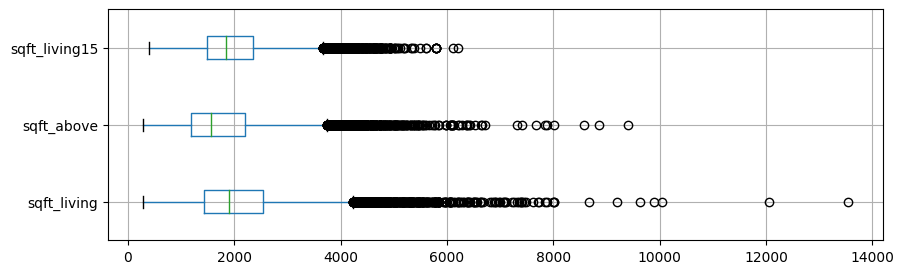

In [13]:
# Plotting the outlier from the data
df.boxplot(columns, figsize=(10,3), vert=False)

## Treating the outliers

In [14]:
# create an empty list to store values
column_names = []
total_outliers = []
percentage = []
least_outlier = []

outlierFilter=None

# loop through all column list
for column in columns:
    # finding the 1st quartile
    q1 = df[column].quantile(0.25)

    # finding the 3rd quartile
    q3 = df[column].quantile(0.75)

    # get the column minimum and median values
    min_value = df[column].min()
    median_value = df[column].median()

    # finding the iqr region
    iqr = q3-q1

    # finding upper and lower whiskers
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)

    # Get the array data for sqft_living
    arr1 = df[column]

    # Get the outliers in sqft_living using the upper and lower whiskers
    outliers = arr1[(arr1 <= lower_bound) | (arr1 >= upper_bound)]
    
    # get the min value of the outliers found
    min_value = round(min(outliers.values)) if len(outliers.values) > 0 else 0
    
    # calculate the percentage of the outliers found
    percentage_value = round((len(outliers.values) / len(arr1)) * 100, 2) if len(outliers.values) > 0 else 0
    
    # add values to the list
    column_names.append(column)
    total_outliers.append(len(outliers.values))
    least_outlier.append(min_value)
    percentage.append(percentage_value)
    
    # do this if outliers is less than or equal to 5%
    if round(percentage_value) <= 5 and round(percentage_value) > 0 and len(outliers.values) > 0:
        # capping Outliers using IQR Ranges
        df.loc[(df[column] <= lower_bound), column] = lower_bound
        df.loc[(df[column] >= upper_bound), column] = upper_bound
        
    # do this if outliers is greater than 5%
    elif round(percentage_value) > 5 and round(percentage_value) > 0 and len(outliers.values) > 0:
        # replacing outlier values with the median value
        df.loc[(df[column] <= lower_bound), column] = median_value
        df.loc[(df[column] >= upper_bound), column] = median_value


print('Outliers Table Summary')

# create a new dictionary
new_dict = {'Column Name': column_names, 'Number of Outliers': total_outliers, 'Least Value': least_outlier, 'Percentage Value': percentage}
# create a new dataframe table
new_df = pd.DataFrame(new_dict)
# display the new dataframe table
new_df

Outliers Table Summary


,Column Name,Number of Outliers,Least Value,Percentage Value
0,sqft_living,572,4240,2.65
1,sqft_above,619,3740,2.86
2,sqft_living15,544,3670,2.52


In [15]:
# To display the shape of the array for the dataset, we use the function below.
df.shape

(21613, 19)

<AxesSubplot: >

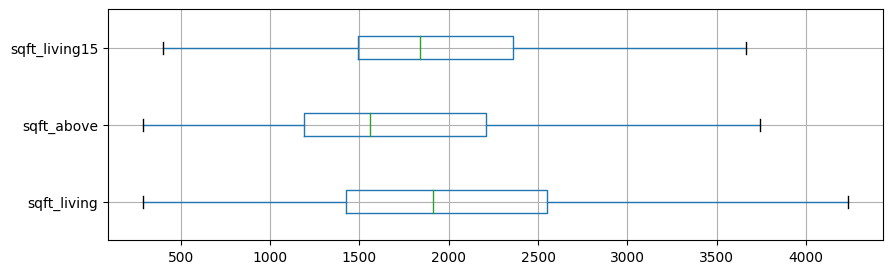

In [16]:
# Plotting the data again after outlier treatment     
df.boxplot(columns, figsize=(10,3), vert=False)

## Data Visualization

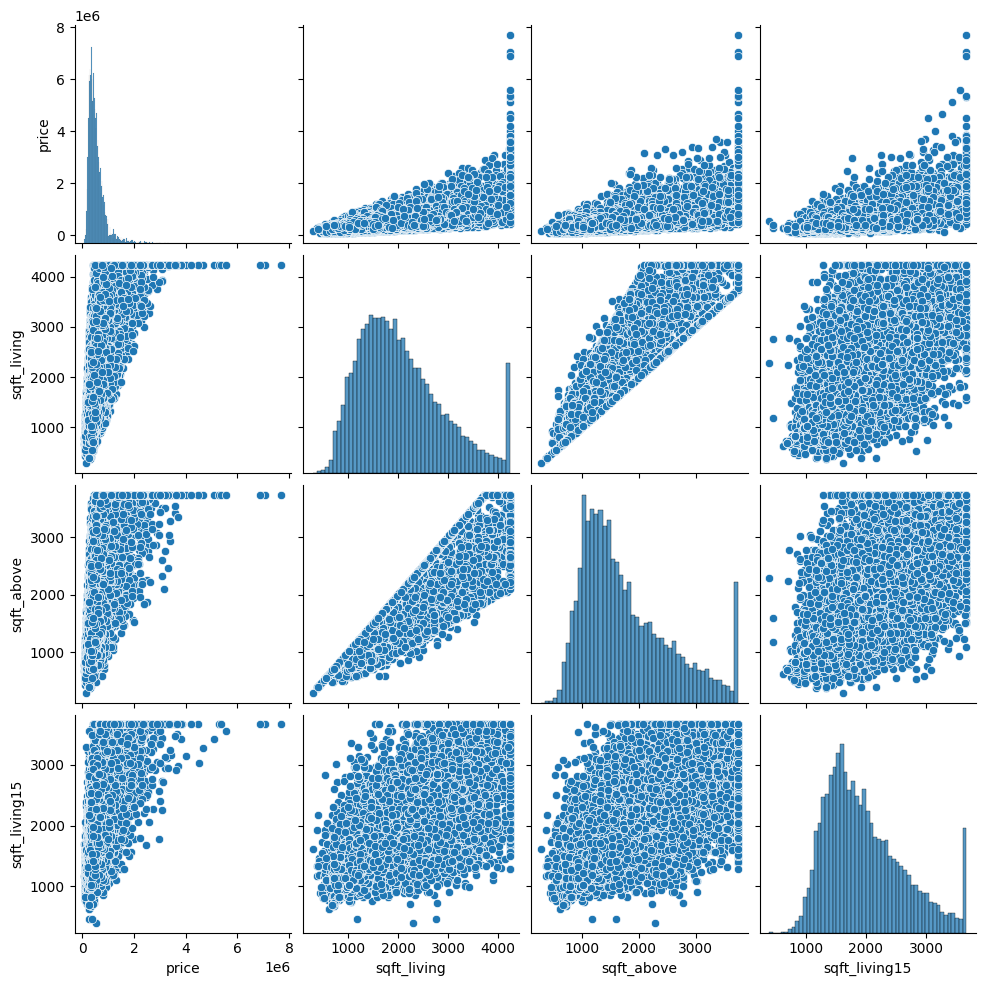

In [17]:
# insert price into the column list
columns.insert(0, 'price')
# plot the graphs
sns.pairplot(df[columns])

In [18]:
# remove price from the column list
columns.remove('price')

## Model Building

In [19]:
# get the independent (input) variables
X = df[columns].values 

In [20]:
# get the dependent (target) variable
y = df[['price']].values 

In [21]:
# split data into test and train using 30% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=100)

In [22]:
# build the linear regression model
model = LinearRegression()

The reason why I choose to use the Linear regression because the outcome variable is a numeric variable.

## Model training

In [23]:
# train the linear regression model
model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

In [24]:
# find the coefficients
coef_value = model.coef_[0]
print('Coefficients: ', ', '.join(str(round(e, 1)) for e in coef_value))

# find the intercept
intercept = model.intercept_
print('Intercept: ', round(intercept[0], 1))

# find the mean squared errors
print('Mean squared error (Training): %.1f' % mean_squared_error(y_train, model.predict(X_train)))
print('Mean squared error (Testing): %.1f' % mean_squared_error(y_test, model.predict(X_test)))

# find the mean absolute error
print('Mean absolute error: ', round(mean_absolute_error(y_test, model.predict(X_test)), 1))

# find the R^2 value:
coef_det = r2_score(y_test, model.predict(X_test))
print('Coefficient of determination (R^2 score): ', round(r2_score(y_test, model.predict(X_test)) * 100, 2), '%')

# display the training and testing scores
print('Training Score: ', round(model.score(X_train, y_train) * 100, 1), '%')
print('Testing Score: ', round(model.score(X_test, y_test) * 100, 1), '%')

Coefficients:  246.1, -33.2, 106.6
Intercept:  -117426.4
Mean squared error (Training): 76350485069.5
Mean squared error (Testing): 76899826964.8
Mean absolute error:  175521.2
Coefficient of determination (R^2 score):  43.37 %
Training Score:  43.3 %
Testing Score:  43.4 %


From the above training score value, the model did not perform well, there are ways in which the model could be improved:

How to improve the model performance.

• By carefully tuning the Hyperparameters using the test size and random state and observing the coefficient of determination and errors to see which works best for the model.

• By removing extreme values (outliers) irrelevant in the dataset can help improve the model performance since linear regression models are sensitive to outlier effects.

• By adding more features with high correlations and importance scores to the input variable X and re-training the model.